<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/Similar_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters
import random

In [40]:
subj_1 = datafetch.fetch_subject(12)
subj_1.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [134]:
x_train = subj_1['train_data_class1']
y_train = np.ones(25)
y_train_T = subj_1['train_data_class1']
x_train.shape


(25, 7200, 63)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras

In [0]:
input_ = keras.layers.Input(shape=(None, 63), name='inputtt')
hidden1 = keras.layers.TimeDistributed(keras.layers.Dense(50, activation="relu"))(input_)
hidden2 = keras.layers.TimeDistributed(keras.layers.Dense(40, activation="relu"))(hidden1)
hidden3 = keras.layers.TimeDistributed(keras.layers.Dense(30, activation="relu"))(hidden2)
hidden3_0 = keras.layers.GRU(1)(hidden3)
hidden3_1 = keras.layers.Dense(30, activation="relu")(hidden3_0)
hidden3_2 = keras.layers.Dense(30, activation="relu")(hidden3_1)

hidden4 = keras.layers.TimeDistributed(keras.layers.Dense(40, activation="relu"))(hidden3)
hidden5 = keras.layers.TimeDistributed(keras.layers.Dense(63, activation="relu"))(hidden4)
output = keras.layers.Dense(1, name="time_series_output")(hidden5)
aux_output = keras.layers.Dense(4, activation='softmax', name="label_output")(hidden3_2)
model = keras.Model(inputs=[input_], outputs=[output,
aux_output])


In [0]:
model = keras.models.Sequential()

model.add(keras.layers.GRU(12,input_shape=[None, 63], return_sequences=True))
model.add(keras.layers.Dense(12))
model.add(keras.layers.GRU(1))
model.add(keras.layers.Dense(4, activation='softmax'))

In [121]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputtt (InputLayer)            [(None, None, 63)]   0                                            
__________________________________________________________________________________________________
time_distributed_35 (TimeDistri (None, None, 50)     3200        inputtt[0][0]                    
__________________________________________________________________________________________________
time_distributed_36 (TimeDistri (None, None, 40)     2040        time_distributed_35[0][0]        
__________________________________________________________________________________________________
time_distributed_37 (TimeDistri (None, None, 30)     1230        time_distributed_36[0][0]        
___________________________________________________________________________________________

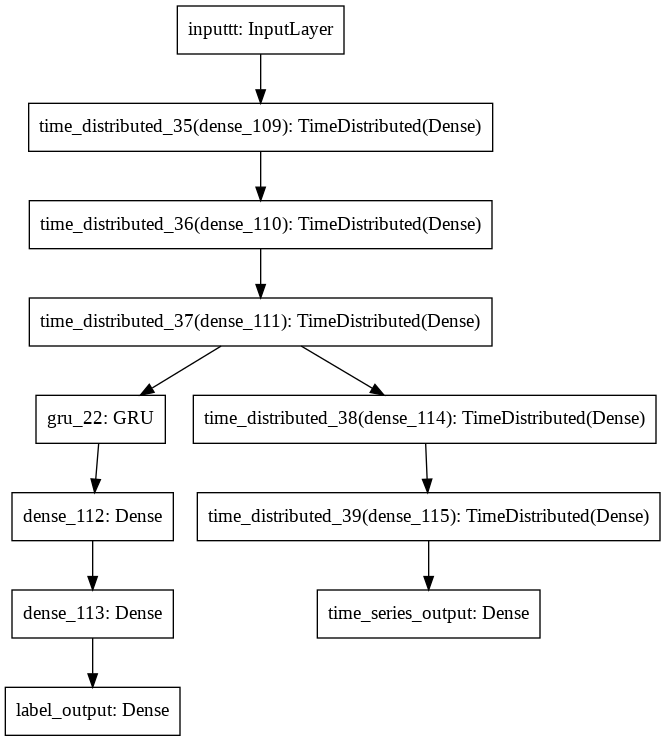

In [122]:
keras.utils.plot_model(model)
from IPython.display import Image
Image('model.png')

In [0]:
model.compile(optimizer='adam', 
              loss = ['MSE', 'sparse_categorical_crossentropy'],
              metrics = ['accuracy'])

In [139]:
x_train.shape, y_train_T.shape, y_train.shape

((25, 7200, 63), (25, 7200, 63), (25,))

In [140]:
model.fit(x_train, (y_train_T, y_train) )

1/1 [==============================] - 0s 2ms/step - loss: 327.1410 - time_series_output_loss: 325.7080 - label_output_loss: 1.4330 - time_series_output_accuracy: 0.0000e+00 - label_output_accuracy: 0.0400
